Notes:
-Poly into Lasso....
-# Coefficients (pd.Series(ridge.coef_, index=features).plot.bar(figsize=(15, 7)))
model.coef_ (3.01)
-model intercepts...model.intercept_ (3.01)
-What is the null score....
-Heteroscedasticity....y_pred vs. residuals
-RMSE sgrt(mean_squared_error(y, y_hat)) !!!! MSE(mean_squared_error(y, y_hat))!!!
     >less error....better fit....
-Polynomial fit?
-scale data?
-Normalize columns (does it impact correlation?) (natural log)
-Correllations....
-Regularization (Scale...)(try L1 and L2 in the LogReg ....)
    >Ridge
    >Lasso
    >Elastic Net
-Remove similar variables
-To many variables?
-Underfit? Overfit?
-Cross Validation score....
-R2 score....R2 adjusted....
-LINEM....(bottom of 3.01)



In [6]:
# Imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

In [7]:
import pandas as pd

train = pd.read_csv('./1- Datasets/train_general2.csv')


In [9]:
test = pd.read_csv('1- Datasets/test.csv', keep_default_na=False, na_values=[''])

In [10]:
train.shape

(2008, 81)

In [11]:
train.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000


### Train-test splitting

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [13]:
X=train[['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF','Year Built','Full Bath']]

In [14]:
X.shape

(2008, 7)

In [15]:
y = train['SalePrice']

In [16]:
y.shape

(2008,)

In [17]:
# X before y; train before test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
# Get the shapes the training and testing subsets
print("X Shapes:")
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")
print(" ")
print("y Shapes:")
print(f"Train: {y_train.shape}")
print(f"Test: {y_test.shape}")

X Shapes:
Train: (1506, 7)
Test: (502, 7)
 
y Shapes:
Train: (1506,)
Test: (502,)


### Linear Regression model fit

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8267029462628541, 0.8327039014675297)

In [21]:
train_pred = lr.predict(X_train)
test_pred = lr.predict(X_test)

In [22]:
#check on the historical increase....

### Cross Validation

In [24]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [25]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=5)
lr_scores.mean()

0.8241085244168387

In [26]:
display(X_test.shape, X_train.shape,y_train.shape,y_test.shape)

(502, 7)

(1506, 7)

(1506,)

(502,)

In [44]:
cross_val_predict(estimator=lr, X=X, y=y)[0:10]

array([163730.2005797 , 238979.54986879, 121152.57594008, 138827.15205693,
       130974.74280144, 216903.34484227, 146860.94927296, 149437.24541981,
       116215.16042808, 199627.16140108])

## Interpreting Slopes

In [27]:
features = ['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area', 'Total Bsmt SF','Year Built','Full Bath']

In [28]:
list(zip(features, lr.coef_))

[('Overall Qual', 18999.996650947633),
 ('Gr Liv Area', 58.558225234009534),
 ('Garage Cars', 1703.212754751269),
 ('Garage Area', 46.39793968287538),
 ('Total Bsmt SF', 32.98975317835291),
 ('Year Built', 395.43622060522455),
 ('Full Bath', -10922.620835186926)]

In [29]:
dict(zip(features, lr.coef_))

{'Overall Qual': 18999.996650947633,
 'Gr Liv Area': 58.558225234009534,
 'Garage Cars': 1703.212754751269,
 'Garage Area': 46.39793968287538,
 'Total Bsmt SF': 32.98975317835291,
 'Year Built': 395.43622060522455,
 'Full Bath': -10922.620835186926}

In [30]:
# Use a data frame
pd.DataFrame(lr.coef_, index=features, columns=['Coefficient'])

,Coefficient
Overall Qual,18999.996651
Gr Liv Area,58.558225
Garage Cars,1703.212755
Garage Area,46.397940
Total Bsmt SF,32.989753
Year Built,395.436221
Full Bath,-10922.620835


In [31]:
[f'{X.columns[i]}: {lr.coef_[i]}' for i in range(len(X.columns))]

['Overall Qual: 18999.996650947633',
 'Gr Liv Area: 58.558225234009534',
 'Garage Cars: 1703.212754751269',
 'Garage Area: 46.39793968287538',
 'Total Bsmt SF: 32.98975317835291',
 'Year Built: 395.43622060522455',
 'Full Bath: -10922.620835186926']

In [32]:
#Notes:
# interpret our radio coef:
# All else held equal, for a one-unit increase in radio advertising, we expect to see
# a sales increase of about 0.19 units.

## Making predictions

In [33]:
# get predictions from our X data
predictions = lr.predict(X)

In [34]:
predictions[0:5]

array([163802.92449459, 238464.084914  , 120543.20166924, 139887.12526858,
       130559.87562204])

In [35]:
#Compare to actual values
y.head()

0    130500
1    220000
2    109000
3    174000
4    138500
Name: SalePrice, dtype: int64

### Residuals

In [36]:
# calculate residuals (y - yhat/predicted values)
residuals = y - predictions
residuals[0:5]

0   -33302.924495
1   -18464.084914
2   -11543.201669
3    34112.874731
4     7940.124378
Name: SalePrice, dtype: float64

In [37]:
round(np.mean(residuals),2)

186.87

In [38]:
# mean of residuals
residuals.mean()

186.86628475913932

In [39]:
np.mean(residuals)

186.86628475913932

## Residuals plot

In [48]:
predictions = lr.predict(X)

In [ ]:
residuals = y_test - pred

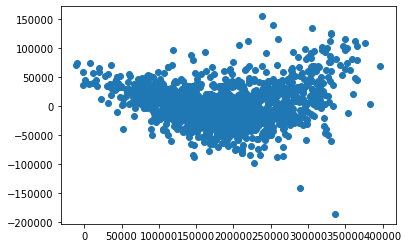

In [47]:
plt.scatter(predictions, residuals)

## LINE Assumptions 

* L - Linearity: there is a linear relationship between x and y (fix: apply non-linear transformation)
* I - Independence of residuals (usually assumed)
* N - Normality: residuals are normally distributed (fix: log y variable)
* E - Equality of variance: residuals have constant variance (fix: check outliers, non-linear transformation)

In [40]:
# I assumption:
# true by assumption

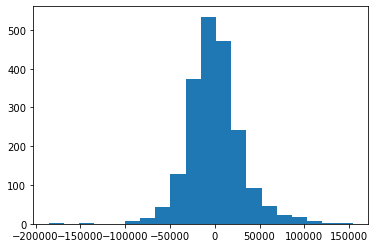

In [41]:
# N assumption:
#Check the normality (of residuals) assumption
plt.hist(residuals, bins = 20);

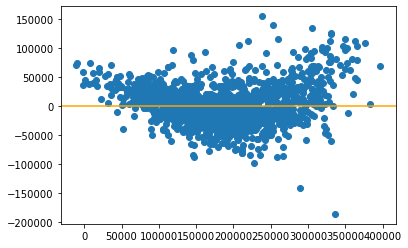

In [42]:
# L and E assumption
# our actual residuals
plt.scatter(predictions, residuals)
plt.axhline(0, color='orange');

### MSE and RMSE

In [49]:
# MSE for training
mean_squared_error(y_true=y_train, y_pred=train_pred)

877993398.4230669

In [50]:
# MSE for testing
mean_squared_error(y_true=y_test, y_pred=test_pred)

990410385.1088078

In [51]:
# RMSE for training
mean_squared_error(y_true=y_train, y_pred=train_pred, squared = False)

29630.95338363359

In [52]:
# RMSE for testing
mean_squared_error(y_true=y_test, y_pred=test_pred, squared = False)

31470.78621688387

## Coefficient of Determination, $R^2$

In [53]:
# Null prediction
null_prediction = y.mean()

In [54]:
# Null residuals
null_residuals = y - null_prediction

In [55]:
# Null sum of squares
null_ss = (null_residuals ** 2).sum()

In [56]:
null_ss

10617599577557.314

In [57]:
# # R2 by hand
# 1 - rss / null_ss

In [58]:
# # R2 from sklearn
# metrics.r2_score(y, predictions)

In [103]:
# R2 from model
R2 = round(lr.score(X, y),2)
R2

0.83

In [105]:
f'**Interpretation**-${R2} of the variance/variability in our y variable is explained by the features in our model!'

'**Interpretation**-$0.83 of the variance/variability in our y variable is explained by the features in our model!'

### Adjusted R-squared

In [106]:
#Adjusted R-squared: Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

n = len(y)
k = len(features)

1 - ((1-R2)*(n-1)/(n-k-1))

0.829405

Adjusted $R^2$ is used to compare models that have different numbers of features.

### True vs. Predicted

In [65]:
#y_test vs. y_preds

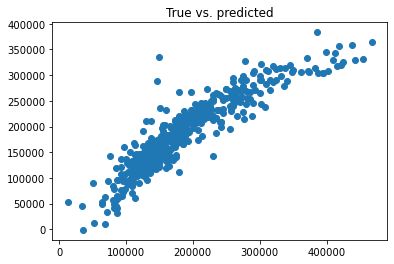

In [66]:
plt.scatter(y_test, test_pred)
plt.title('True vs. predicted');

### Cross Validation

In [68]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [69]:
lr_scores = cross_val_score(lr, X_train, y_train, cv=3)
lr_scores.mean()

0.8236092260302383

In [70]:
lr.predict(X_test)

array([ 52481.1205114 , 112263.97080315, 117592.58652228, 189232.13084332,
       111178.38840431, 140896.5110957 , 245149.41035307, 195722.77147817,
        79077.4763897 , 137933.53765855, 132772.09977903, 127196.27703715,
       128623.18730397, 211143.98069822, 191650.18531236, 231308.17741025,
       110591.46615328, 335612.40553223,  84696.32135303, 215355.70202682,
       134169.36689311, 135774.5237083 , 128479.32699421, 241875.51138615,
       136638.05256863, 176827.72055844, 125357.28493299, 125037.2586613 ,
       243963.75427399, 188405.55247045, 225686.40249751, 180761.86785501,
       115486.69070713, 115280.54698063, 164429.43845098, 174257.33488994,
       108123.73141962, 173645.66103332, 174574.47338005, 102779.26596349,
       251905.40497219,  76874.76395427, 304577.14477078,  95313.31236495,
       198336.10226939, 169483.69357045, 112117.04649567, 262435.86023992,
       225196.51007567, 314472.12376793, 318486.87855944, 297866.64567372,
       210071.0796357 , 2

In [71]:
cross_val_predict(estimator=lr, X=X, y=y)[0:10]

array([163730.2005797 , 238979.54986879, 121152.57594008, 138827.15205693,
       130974.74280144, 216903.34484227, 146860.94927296, 149437.24541981,
       116215.16042808, 199627.16140108])

### Polynomial fit

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
from sklearn.preprocessing import PolynomialFeatures

#pf = PolynomialFeatures(include_bias=False)

#pf.fit(X_train)

In [74]:
# Instantiate our PolynomialFeatures object to create all two-way terms.
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

# Fit and transform our X data.
X_overfit = poly.fit_transform(X)

In [75]:
# Check out the dimensions of X_overfit.
X_overfit.shape

(2008, 35)

In [76]:
poly.get_feature_names(X.columns)

['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 'Year Built',
 'Full Bath',
 'Overall Qual^2',
 'Overall Qual Gr Liv Area',
 'Overall Qual Garage Cars',
 'Overall Qual Garage Area',
 'Overall Qual Total Bsmt SF',
 'Overall Qual Year Built',
 'Overall Qual Full Bath',
 'Gr Liv Area^2',
 'Gr Liv Area Garage Cars',
 'Gr Liv Area Garage Area',
 'Gr Liv Area Total Bsmt SF',
 'Gr Liv Area Year Built',
 'Gr Liv Area Full Bath',
 'Garage Cars^2',
 'Garage Cars Garage Area',
 'Garage Cars Total Bsmt SF',
 'Garage Cars Year Built',
 'Garage Cars Full Bath',
 'Garage Area^2',
 'Garage Area Total Bsmt SF',
 'Garage Area Year Built',
 'Garage Area Full Bath',
 'Total Bsmt SF^2',
 'Total Bsmt SF Year Built',
 'Total Bsmt SF Full Bath',
 'Year Built^2',
 'Year Built Full Bath',
 'Full Bath^2']

In [77]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.7,
    random_state=42
)

In [78]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [79]:
print(f'Z_train shape is: {Z_train.shape}')
print(f'y_train shape is: {y_train.shape}')
print(f'Z_test shape is: {Z_test.shape}')
print(f'y_test shape is: {y_test.shape}')

Z_train shape is: (602, 35)
y_train shape is: (602,)
Z_test shape is: (1406, 35)
y_test shape is: (1406,)


## Polynomial transformed OLS

In [80]:
# Import the appropriate library and fit our OLS model.
from sklearn.linear_model import LinearRegression

In [81]:
ols = LinearRegression()
ols.fit(Z_train, y_train)

LinearRegression()

In [82]:
#model score on the training and test data
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))

0.8860280129114594
0.8562519825480465


In [83]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV


In [84]:
# Ridge regressor:
from sklearn.linear_model import Ridge

In [85]:
# Instantiate.
ridge_model = Ridge(alpha=10)

# Fit.
ridge_model.fit(Z_train, y_train)

# Evaluate model using R2.
print(ridge_model.score(Z_train, y_train))
print(ridge_model.score(Z_test, y_test))

0.8749469027580197
0.8657139358433136


In [110]:
# Ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
r_alphas = np.logspace(0, 5, 100)

# Cross-validate over list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
test_ridge_cv = ridge_cv.fit(Z_train, y_train)

In [112]:
# Here is the optimal value of alpha
test_ridge_cv.alpha_

1.0

Our `ridge_model` object is actually already the model with the optimal $\alpha$. Let's get the corresponding value of $R^2$.

In [113]:
print(test_ridge_cv.score(Z_train, y_train))
print(test_ridge_cv.score(Z_test, y_test))

0.8817407249517755
0.8629305996335539


## LASSO Regression

In [114]:
print(" OLS ".center(18, "="))
print(ols.score(Z_train, y_train))
print(ols.score(Z_test, y_test))
print()
print(" Ridge ".center(18, "="))
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

====== OLS =======
0.8860280129114594
0.8562519825480465

===== Ridge ======
0.8817407249517755
0.8629305996335539


In [115]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 0, 100)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=5000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

C:\Users\pharr\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 132355748491.56506, tolerance: 276053562.5134129
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pharr\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 130754638360.91138, tolerance: 276053562.5134129
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pharr\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 128692496942.9685, tolerance: 276053562.5134129
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\pharr\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: Conv

In [116]:
# Here is the optimal value of alpha
lasso_cv.alpha_

0.9326033468832199

In [117]:
print(lasso_cv.score(Z_train, y_train))
print(lasso_cv.score(Z_test, y_test))

0.8832594091701051
0.8582335164041694


## Model Fitting and Evaluation
---

`RidgeCV` seems to be doing the best, so let's move forward with that model. Fit the model to the training data, and evaluate the training and test scores below.

In [130]:
ridge_cv.score(Z_train, y_train)

0.8817407249517755

In [119]:
ridge_cv.score(Z_test, y_test)

0.8629305996335539

In [132]:
ridge_predictions = ridge_cv.predict(Z_test)

In [124]:
test_ridge_cv.predict(poly.fit_transform(X))

array([4.02745321e+10, 3.96481047e+10, 3.55785066e+10, ...,
       3.65733796e+10, 3.36866554e+10, 3.82200328e+10])

<AxesSubplot:>

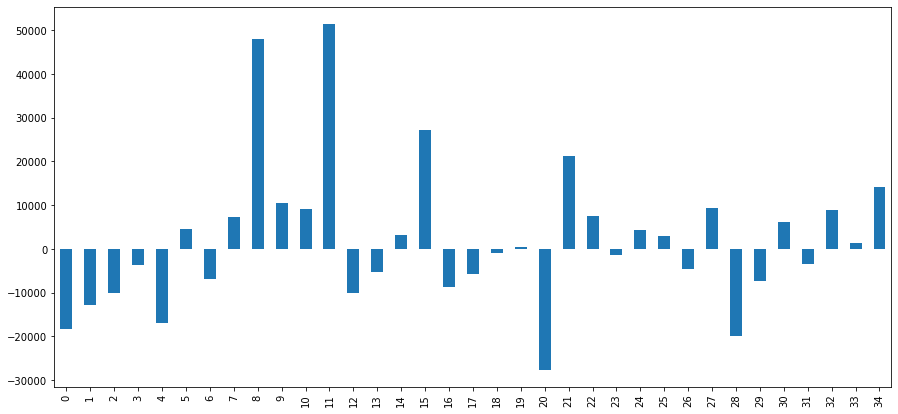

In [128]:
pd.Series(test_ridge_cv.coef_).plot.bar(figsize=(15, 7))

### Most powerful coefficients

<AxesSubplot:>

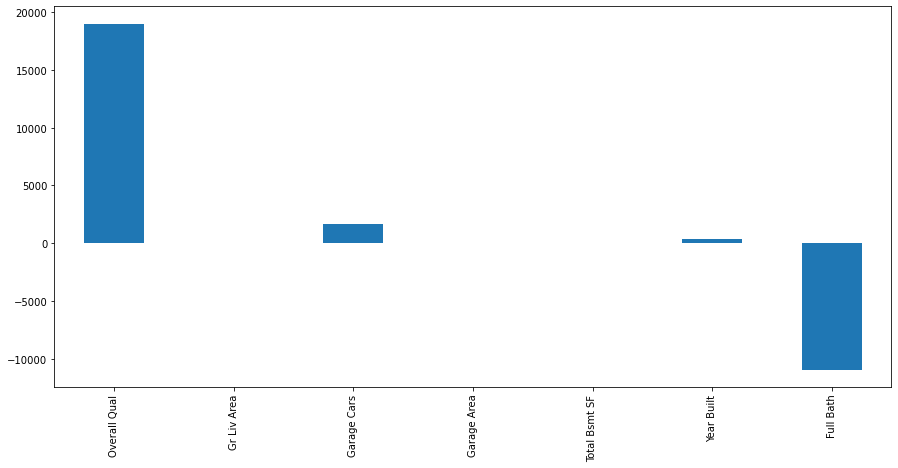

In [138]:
pd.Series(lr.coef_, index=features).plot.bar(figsize=(15, 7))

<AxesSubplot:>

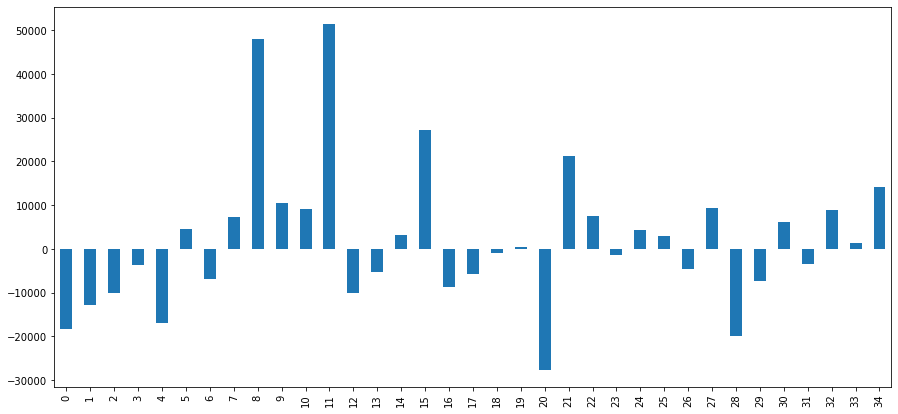

In [139]:
pd.Series(ridge_cv.coef_).plot.bar(figsize=(15, 7))

### Export transform test data for ridge and Lasso model

In [141]:
new_kaggle_test = test[['Overall Qual', 'Gr Liv Area','Garage Cars', 'Garage Area','Total Bsmt SF','Year Built','Full Bath']]

In [142]:
X=new_kaggle_test

In [143]:
# Fit and transform kaggle data.
X_overfit_kaggle = poly.fit_transform(X)

In [144]:
X.shape

(878, 7)

In [145]:
poly.get_feature_names(X.columns)

['Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 'Year Built',
 'Full Bath',
 'Overall Qual^2',
 'Overall Qual Gr Liv Area',
 'Overall Qual Garage Cars',
 'Overall Qual Garage Area',
 'Overall Qual Total Bsmt SF',
 'Overall Qual Year Built',
 'Overall Qual Full Bath',
 'Gr Liv Area^2',
 'Gr Liv Area Garage Cars',
 'Gr Liv Area Garage Area',
 'Gr Liv Area Total Bsmt SF',
 'Gr Liv Area Year Built',
 'Gr Liv Area Full Bath',
 'Garage Cars^2',
 'Garage Cars Garage Area',
 'Garage Cars Total Bsmt SF',
 'Garage Cars Year Built',
 'Garage Cars Full Bath',
 'Garage Area^2',
 'Garage Area Total Bsmt SF',
 'Garage Area Year Built',
 'Garage Area Full Bath',
 'Total Bsmt SF^2',
 'Total Bsmt SF Year Built',
 'Total Bsmt SF Full Bath',
 'Year Built^2',
 'Year Built Full Bath',
 'Full Bath^2']

In [146]:
# Create train/test splits.
X_train, X_test, y_train, y_test = train_test_split(
    X_overfit,
    y,
    test_size=0.7,
    random_state=42
)

In [147]:
# Scale our data.
# Relabeling scaled data as "Z" is common.
sc = StandardScaler()
Z_train_kaggle = sc.fit_transform(X_overfit_kaggle)
Z_test = sc.transform(X_test)

In [148]:
test_preds = ols.predict(Z_train_kaggle)

In [149]:
test['SalePrice'] = test_preds

In [153]:
#test[['Id', 'SalePrice']].to_csv('2-Submissions/fifth_model.csv', index=False)

In [ ]:
ols.coef_

In [ ]:
### Export

In [ ]:
test_subset = test[X.columns]
test_preds = lr.predict(test_subset)

In [ ]:
test['SalePrice'] = test_preds

In [ ]:
test[['Id', 'SalePrice']].to_csv('submissions/second_model.csv', index=False)

In [ ]:
#test[['Id', 'SalePrice']].to_csv('submissions/third_model.csv', index=False)

In [ ]:
#second = pd.read_csv('./submissions/second_model.csv')

In [ ]:
# second.shape

In [ ]:
# third = pd.read_csv('./submissions/third_model.csv')

In [ ]:
# third.shape